In [ ]:
'''
np.mean = 주어진 데이터의 산술평균을 구해준다

np.var = 주어진 데이터의 분산을 구해준다
분산은 (평균 - 데이터)**2을 총 갯수로 나눈것
데이터들이 평균으로부터 보통 어느정도 범위에 있는지에 대해 나타낸다
하지만 평균-데이터를 제곱하기 때문에 실질적 데이터와 직관적인 수치라고 볼 수 없다
그래서 표준편차를 쓰는데 양의 제곱근을 씌워서 실질적으로 어느정도의 오차들을 가지고있는지에 대해
나타낸다고 함.

np.std = 데이터의 표준편차를 구해준다
분산에 **0.5로 루트를 씌운 값

np.cov() = 데이터의 공분산을 구해주는데 매트릭스 형태로 구해준다
공분산은 특정 데이터가 증가하거나 감소할때 다른 데이터는 그에따라 증가와 감소의 경향을 양수와 음수로 나타내준다.
하지만 방향성은 나타낼 수 있지만 어느정도인지는 알 수 없다.

'''

In [ ]:
'''
Linearregression()은 입력받은 두 데이터에 대해 선형회귀분석 모델을 
만들어준다. 
선형회귀분석 모델은 쉽게말해서 두 데이터 간의 상관관계를 분석해서
분석결과를 토대로 작성된 모델에 특정 데이터를 입력했을 때, 그에 맞는 결괏값을
출력해줄 수 있는 모델이다.

1. 제일 첫번째로 분석할 데이터를 7:3 혹은 8:2로 나누어 train/test로 
분류한다.

2. train으로 분류된 데이터에서 각 칼럼들을 쪼개서 결괏값과 같이
Linearregression()에 넣어서 모델을 만들어 이것을 model_AT(여기서
AT는 아래 데이터의 온도데이터)와 같이 만들어준다.
# 위에서 reshape(-1,1)을 해준 이유는 입력값이 2차원 array형태로 입력되어야
하기 때문이다. 만약 변수가 하나가 아니고 여러개일수도 있기 때문이다.
다시말해 이 케이스에서는 변수가 하나라서 reshape을 해주는거고 여러개일땐 안해줘도
된다.

3. 생성된 model_AT에 .predict(test_AT.reshape(-1,1))과 같이
입력해주는데 여기서는 test_AT에 해당하는 정답값인 test_PE가 존재한다.

4. MAE(Mean Absolute Error//평균절대오차)를 구해주는데

'''

### 복합 화력발전소 발전량 예측
- Feature
    - AT (temperature) : 온도
    - V (Exhaust Vacuum) : 배기진공
    - AP (Ambient Pressure) : 주위압력
    - RH (Relative Humidity) : 상대습도
- Target
    - PE (net hourly eletrical energy output) : 시간당 전기 에너지 출력

#### 1. 데이터 로드

In [2]:
import pickle
columns = ["AT", "V", "AP", "RH", "PE"]

with open("datas/thermal_power_plant.plk", "rb") as file:
    datas = pickle.load(file)
    


array([[   8.34,   40.77, 1010.84,   90.01,  480.48],
       [  23.64,   58.49, 1011.4 ,   74.2 ,  445.75],
       [  29.74,   56.9 , 1007.15,   41.91,  438.76],
       ...,
       [  15.99,   43.34, 1014.2 ,   78.66,  465.96],
       [  17.65,   59.87, 1018.58,   94.65,  450.93],
       [  23.68,   51.3 , 1011.86,   71.24,  451.67]])

In [35]:
import matplotlib.pyplot as plt

In [75]:
idx = int(len(datas)*0.3)
# AT = datas[:,0]
# V = datas[:,1]
# AP = datas[:,2]
# RH = datas[:,3]
# PE = datas[:,4]
train_AT = datas[:-idx,0]
train_V = datas[:-idx,1]
train_AP = datas[:-idx,2]
train_RH = datas[:-idx,3]
train_PE = datas[:-idx,4]

test_AT = datas[-idx:,0]
test_V = datas[-idx:,1]
test_AP = datas[-idx:,2]
test_RH = datas[-idx:,3]
test_PE = datas[-idx:,4]

0.8972298219790403

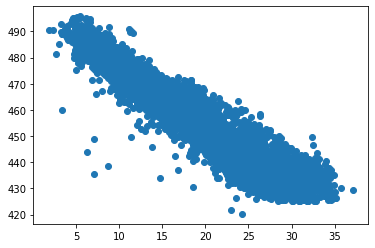

In [143]:
## AT & PE
AT_chart = plt.plot(train_AT,train_PE,'o')
np.corrcoef(train_AT,train_PE)[0,1]**2

0.7597928458067955

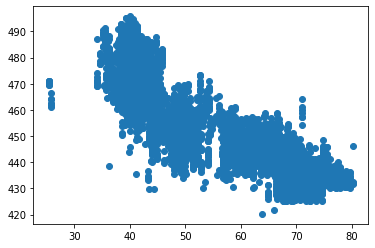

In [122]:
## V & PE
V_chart = plt.plot(train_V,train_PE,'o')
np.corrcoef(train_V,train_PE)[0,1]**2

0.2632116141898373

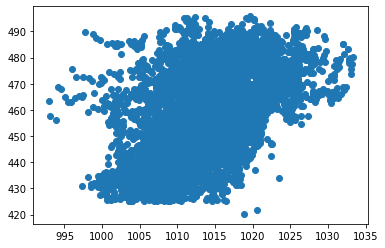

In [144]:
AP_chart = plt.plot(train_AP,train_PE,'o')
np.corrcoef(train_AP,train_PE)[0,1]**2

0.15047488515883073

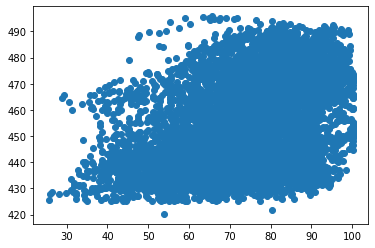

In [145]:
RH_chart = plt.plot(train_RH,train_PE,'o')
np.corrcoef(train_RH,train_PE)[0,1]**2

#### 2. 각 컬럼별 상관계수 구하기

In [30]:
# 상관계수
np.corrcoef(AT,PE)[0,1],np.corrcoef(V,PE)[0,1],np.corrcoef(AP,PE)[0,1],np.corrcoef(RH,PE)[0,1]


(-0.948128470416759,
 -0.8697803096577879,
 0.5184290273615736,
 0.3897940997901019)

In [31]:
# 결정계수
np.corrcoef(AT,PE)[0,1]**2,np.corrcoef(V,PE)[0,1]**2,np.corrcoef(AP,PE)[0,1]**2,np.corrcoef(RH,PE)[0,1]**2

(0.898947596414823,
 0.7565177870683973,
 0.26876865641106723,
 0.1519394402311759)

In [66]:
line_fitter = LinearRegression()

In [70]:
line_fitter.fit(AT.reshape(-1,1),PE)
## 여기서 AT는 2차원 array형태여야 하기 때문에 reshape을 해줌

LinearRegression()

In [69]:
line_fitter.predict([[8.34]])
#AT가 8.34일때의 PE값 예측하기

array([478.92531144])

In [74]:
idx = int(len(datas)*0.3)

#### 3. 각 컬럼별 회귀분석 모델 만들기

In [14]:
from sklearn.linear_model import LinearRegression

(9568,)

In [100]:
np.shape(train_AT)

(6698,)

In [99]:
np.shape(train_AT)
np.shape(train_AT.reshape(-1,1))

(6698, 1)

In [87]:
model_AT = LinearRegression().fit(train_AT.reshape(-1,1),train_PE)

In [123]:
model_V = LinearRegression().fit(train_V.reshape(-1,1),train_PE)

In [106]:
model_AP = LinearRegression().fit(train_AP.reshape(-1,1),train_PE)

In [107]:
model_RH = LinearRegression().fit(train_RH.reshape(-1,1),train_PE)

In [124]:
predict_AT = model_AT.predict(test_AT.reshape(-1,1))
predict_V = model_V.predict(test_V.reshape(-1,1))
predict_AP = model_AP.predict(test_AP.reshape(-1,1))
predict_RH = model_RH.predict(test_RH.reshape(-1,1))
predict_AT,test_PE

(array([444.59347725, 457.15437259, 455.89611364, ..., 462.27418485,
        458.67296097, 445.59140676]),
 array([444.04, 455.29, 450.14, ..., 465.96, 450.93, 451.67]))

#### 4. 각 컬럼별 모델 평가하기

In [125]:
AT_mae = np.sum(np.absolute(predict_AT - test_PE)) / len(test_AT)
V_mae = np.sum(np.absolute(predict_V - test_PE)) / len(test_V)
AP_mae = np.sum(np.absolute(predict_AP - test_PE)) / len(test_AP)
RH_mae = np.sum(np.absolute(predict_RH - test_PE)) / len(test_RH)

In [126]:
AT_mae, V_mae, AP_mae, RH_mae

(4.287757845516818, 6.709245406136585, 12.011595029145708, 13.34736775715531)

#### 5. 모든 컬럼을 사용하여 회귀분석 모델 만들어서 평가하기

In [136]:
train_all = datas[:-idx,:-1]
train_PE = datas[:-idx,-1]

test_all = datas[-idx:,:-1]
test_PE = datas[-idx:,-1]

In [137]:
len(train_all),len(train_PE)

(6698, 6698)

In [139]:
model_all = LinearRegression().fit(train_all,train_PE)

In [140]:
predict_all = model_all.predict(test_all)

In [141]:
all_mae = np.sum(np.absolute(predict_all-test_PE)) / len(test_PE)

In [142]:
all_mae

3.616714709526299